In [147]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [148]:
hw = pd.read_csv('/home/jupyter-l.fedoseeva-12/Mat_stats/Lesson_9/hw_bootstrap.csv',sep=";", decimal=',')

In [150]:
hw.dtypes

Unnamed: 0             int64
value                float64
experimentVariant     object
dtype: object

In [154]:
hw.head()

,value,experimentVariant
0,10.380495,Control
1,9.546867,Control
2,11.088215,Control
3,10.147274,Control
4,9.789808,Control


In [153]:
del hw['Unnamed: 0']

In [155]:
hw_bs_control_final = hw.query('experimentVariant == "Control"')['value']

In [156]:
hw_bs_treatment_final = hw.query('experimentVariant == "Treatment"')['value']

Определяем p-value, применив критерий mann-whitney

In [158]:
stats.mannwhitneyu(hw_bs_control_final, hw_bs_treatment_final)

MannwhitneyuResult(statistic=124189.5, pvalue=0.42960742912427896)

Определяем p-value, применив Бутстрап для np.mean

In [49]:
def get_bootstrap(
    hw_bs_control_final, # числовые значения первой выборки
    hw_bs_treatment_final, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(hw_bs_control_final), len(hw_bs_treatment_final)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = hw_bs_control_final.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = hw_bs_treatment_final.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

In [50]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

n = 10000
lift = 1.01

x = np.random.exponential(size=n)
y = np.random.exponential(size=n) * lift

df = pd.DataFrame({"x": x, "y": y})

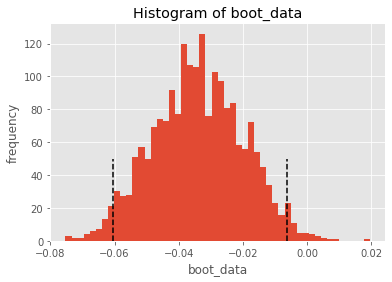

In [51]:
booted_data = get_bootstrap(df.x, df.y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [52]:
booted_data["p_value"]

0.015967841910844854

In [53]:
booted_data["ci"]

,0
0.025,-0.060541
0.975,-0.006225


Определяем p-value, применив критерий Бутстрап для np.median

In [54]:
def get_bootstrap(
    hw_bs_control_final, # числовые значения первой выборки
    hw_bs_treatment_final, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(hw_bs_control_final), len(hw_bs_treatment_final)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = hw_bs_control_final.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = hw_bs_treatment_final.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.median(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.median(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

In [55]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

n = 10000
lift = 1.01

x = np.random.exponential(size=n)
y = np.random.exponential(size=n) * lift

df = pd.DataFrame({"x": x, "y": y})

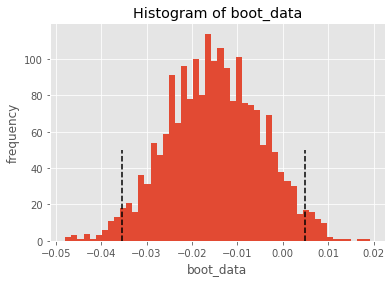

In [56]:
booted_data_med = get_bootstrap(df.x, df.y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [57]:
booted_data_med["p_value"]

0.14835422845115456

In [58]:
booted_data_med["ci"]

,0
0.025,-0.035361
0.975,0.004872


Сформируем гипотезы:
    H0 - говорит о том, что результаты между контролем и тестом не отличаются
    H1 - говорит о том, что результаты между контролем и тестом значимо различаются

Посчитав критерий Манна-Уитни, получили pvalue=0.42960742912427896. т.к. p-value больше 0.05, это
не позволяет нам отклонить нулевую гипотезу.
Посмотрим на бустрап по средним значениям, pvalue=0.015967841910844854 и ДИ от -0.060541 до -0.006225.
Смотрим, попадает ли доверительный интервал в 0 и он не попадает, следовательно, нулевая гипотеза на заданном уровне значимости не принимается.

Посмотрим на бустрап по медиане, pvalue=0.14835422845115456 и ДИ от -0.035361 до 0.004872.
Смотрим, попадает ли доверительный интервал в 0 и он попадает, следовательно, нулевая гипотеза на заданном уровне значимости принимается.